In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load dataset
file_path='/Users/aadya.mukherjee/Documents/git my/Manas_linear/Train.csv'
file_path2='/Users/aadya.mukherjee/Documents/git my/Manas_linear/Train.csv'
data = pd.read_csv(file_path)
data2=pd.read_csv(file_path2)

In [38]:
# Data Preparation
data=data.dropna()
data = pd.get_dummies(data, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)  # One-hot encode categorical variables

data.Mileage=data.Mileage.str.replace('kmpl', ' ').astype(float)
data.Engine=data.Engine.str.replace('CC', ' ').astype(int)
data['Power']=data['Power'].replace('null bhp', '0 bhp')
data.Power=data.Power.str.replace('bhp', ' ').astype(float)

X = data.drop(['Price'], axis=1).values  # Features
y = data['Price'].values  # Target variable

In [41]:
data2=data2.dropna()
#data2 = pd.get_dummies(data2, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)  # One-hot encode categorical variables

#data2.Mileage=data2.Mileage.str.replace('kmpl', ' ').astype(float)
#data2.Engine=data2.Engine.str.replace('CC', ' ').astype(int)
#data2['Power']=data2['Power'].replace('null bhp', '0 bhp')
#data2.Power=data2.Power.str.replace('bhp', ' ').astype(float)

X_test=data2.drop(['Price'], axis=1).values
y_test=data2['Price'].values

In [44]:
# Normalize features
data = data.astype(int)
X = X.astype(int)
X = np.nan_to_num(X, nan=0, posinf=0, neginf=0)
y = y.astype(int)
#X = np.nan_to_num(X)
X_mean = X.mean(axis=0)
X_mean = np.nan_to_num(X_mean, nan=0, posinf=0, neginf=0)
X_std = np.std(X, axis=0)
X_std = np.nan_to_num(X_std, nan=0, posinf=0, neginf=0)
X_normalized = (X - X_mean) / X_std

#data2 = data2.astype(int)
#X_test = X_test.astype(int)
#y_test = y_test.astype(int)
#X_test = np.nan_to_num(X_test)
#X_mean2 = X_test.mean(axis=0)
#X_std2 = np.std(X_test, axis=0)
#X_normalized2 = (X_test - X_mean2) / X_std2


In [45]:
# Add a bias column (intercept)
X_b = np.c_[np.ones(X_normalized.shape[0]), X_normalized]
#X_b2 = np.c_[np.ones(X_normalized2.shape[0]), X_normalized2]

In [46]:
# Linear Regression with Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    weights = np.zeros(X.shape[1])
    cost_history = []

    for _ in range(iterations):
        predictions = X @ weights
        errors = predictions - y
        cost = (1 / (2 * m)) * np.dot(errors, errors)
        cost_history.append(cost)
        
        # Update weights
        weights -= (learning_rate / m) * (X.T @ errors)
    
    return weights, cost_history

In [47]:
# Experiment with different learning rates
learning_rates = [0.01, 0.001, 0.1]
iterations = 1000
results = {}

for lr in learning_rates:
    weights, cost_history = gradient_descent(X_b, y, learning_rate=lr, iterations=iterations)
    results[lr] = cost_history

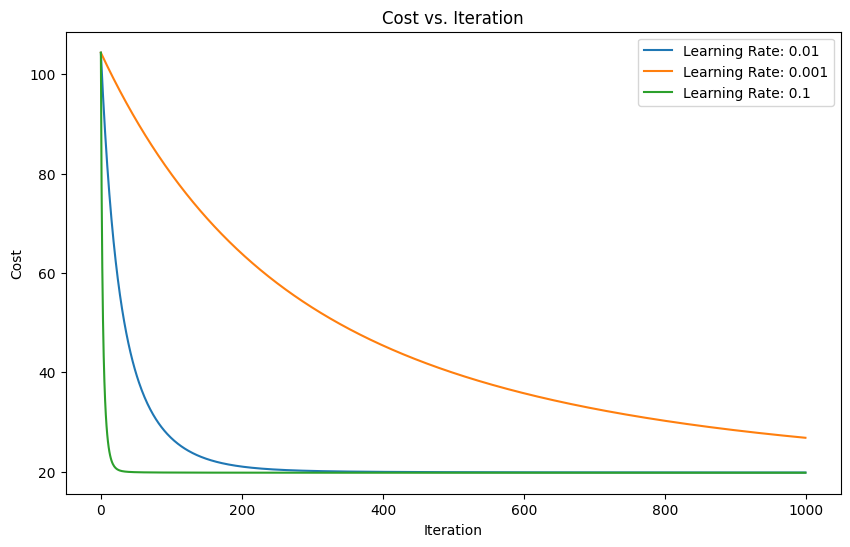

In [48]:
# Plotting Cost vs Iteration
plt.figure(figsize=(10, 6))
for lr, cost in results.items():
    plt.plot(cost, label=f'Learning Rate: {lr}')
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

<Axes: >

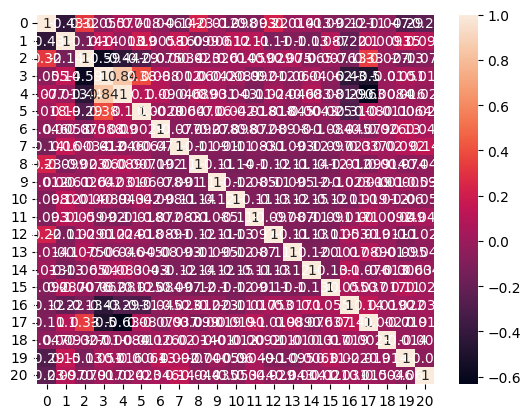

In [49]:
#plotting correlation matrix
#import seaborn as sns
df=pd.DataFrame(X)
numeric_x = df.select_dtypes(include=['number'])
corr_mat = numeric_x.corr()
sns.heatmap(corr_mat, annot=True)

In [54]:
# Make predictions and evaluate the model
def predict(X, weights):
    return X @ weights

y_pred = predict(X_test, weights)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 22 is different from 24)

In [51]:
# Evaluate model performance
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')
def r2_score(y_test, y_pred):
    ss_total=np.sum((y_test -np.mean(y_test))** 2)
    ss_residual=np.sum((y_test - y_pred)** 2)
    return 1-(ss_residual/ss_total)
r2=r2_score(y_test, y_pred)
print("R-Squared (R2) value:", r2)
# Make predictions for new data
# Example new data (replace with actual feature values)

#r_weights=weights[:-1]
#for i in X[0]:
    #new_data = np.array([[(X[i] - X_mean[0]) / X_std[0]]])
    #predicted_price = predict(new_data, r_weights)
    #print(f'Predicted Price: {predicted_price}')

NameError: name 'y_pred' is not defined